In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r'C:\Users\Sravanth vakati\OneDrive\Desktop\Oasis Infobyte\Customer Segmentation Analysis\ifood_df.csv'
df = pd.read_csv(file_path)
print(df.head())
print(df.info())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

In [3]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [4]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Purchase_Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Avg_Purchase_Value'] = df.apply(
    lambda row: row['Total_Spending'] / row['Purchase_Frequency'] if row['Purchase_Frequency'] > 0 else 0,
    axis=1
)
descriptive_stats = df[['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency']].describe()
print(descriptive_stats)

       Total_Spending  Purchase_Frequency  Avg_Purchase_Value      Recency
count     2205.000000         2205.000000         2205.000000  2205.000000
mean       606.821769           14.887982           32.590924    49.009070
std        601.675284            7.615277           28.556446    28.932111
min          5.000000            0.000000            0.000000     0.000000
25%         69.000000            8.000000            9.714286    24.000000
50%        397.000000           15.000000           23.375000    49.000000
75%       1047.000000           21.000000           45.346154    74.000000
max       2525.000000           43.000000          186.500000    99.000000


In [5]:
features = df[['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
kmeans = KMeans(n_clusters=5, random_state=42)
df['Segment'] = kmeans.fit_predict(scaled_features)
segment_analysis = df.groupby('Segment').mean()
print(segment_analysis)

               Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Segment                                                                       
0        76805.464912  0.052632  0.175439  56.032164  787.280702  66.444444   
1        35602.138122  0.760589  0.497238  74.110497   47.298343   5.583794   
2        61611.225389  0.204663  0.735751  71.766839  440.810881  33.062176   
3        35926.525847  0.720143  0.486631  23.648841   56.475936   5.994652   
4        65122.184987  0.163539  0.616622  20.619303  478.080429  43.801609   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Segment                                                                     
0             524.245614        98.482456         68.122807     79.953216   
1              26.042357         7.782689          5.701657     16.003683   
2             180.155440        47.279793         38.253886     67.007772   
3              26.472371         9.062389          5.582888  

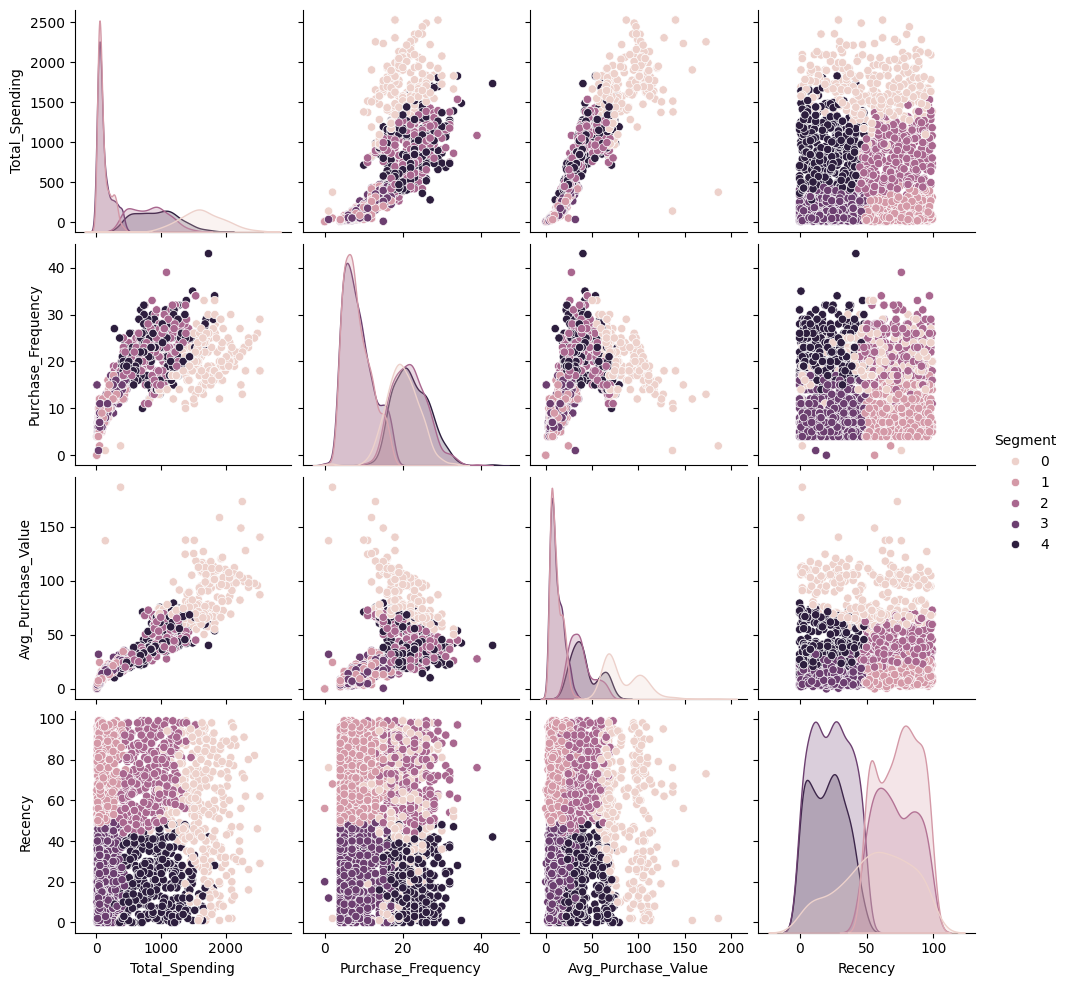

In [6]:
sns.pairplot(df, hue='Segment', vars=['Total_Spending', 'Purchase_Frequency', 'Avg_Purchase_Value', 'Recency'])
plt.show()